# Welcome!

## Introduction (TBC)

This online tutorial was created for a live data visualization workshop held at Sydney University in May 2022.

The purpose of this tutorial is to get you up and running with simple data visualisations in Python as quickly as possible - no prior experience required!

> **How should I use this tutorial?**

First thing to do is to choose where you want to run this interactive tutorial.

Wait, what? You mean I can run Python code directly inside this tutorial without having to install Python?

Yes, absolutely!

There are 3 choices shown below in recommended order - click on any one of the links to get started right away:

1. [Google Colab Notebook](https://colab.research.google.com/github/datawithdanny/dataviz-bootcamp/blob/main/book/1-setup.ipynb)
2. [Binder JupyterHub Instance](https://mybinder.org/v2/gh/datawithdanny/dataviz-bootcamp/main?urlpath=lab/tree/book/1-setup.ipynb)
3. <a onclick="initThebeSBT()">Directly in the browser (you can run but can't edit code!)</a>

**Danny's Recommendation**

This tutorial was designed with interactivity in mind - so I would highly encourage you to open a Google Colab session or Binder JupyterHub session to get your hands dirty and mess around with the code.

The focus should be on making changes to the code and run it to see what happens.

Part of the magic of learning Python and indeed, anything technical in the data world, is to see how things work as you tweak and change things!

> **I have questions, how can I get help?**

If you have any questions or spot any errors - please add a new issue directly at our GitHub repo!

We're a pretty lot but if we've got some time, we'll try our best to help provide some guidance :)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# load our video game sales dataset
df = pd.read_csv("https://raw.githubusercontent.com/DataWithDanny/dataviz-bootcamp/main/book/data/video-game-sales.csv")

# show the first 5 rows
df.head()

,rank,game,platform,release_year,genre,publisher,north_america,europe,japan,other,total_sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

## Data Case Study

Imagine you're an analyst at a data consultancy and we have a project with our new client - Off Switch Gaming.

Our client is a global company and they've commissioned us to help them tell a data driven story about the transformation of video games over the past 2 decades.

In particular the Off Switch team wants us to use a particular data asset one of their team members scraped from the web.

The dataset includes the following fields:

| Column Name   | Description                      |
| ------------- | -------------------------------- |
| rank          | Game ranking by global sales     |
| name          | Name of the game                 |
| platform      | Name of the gaming platform      |
| release_year  | Year a game was released in YYYY |
| genre         | Game genre                       |
| publisher     | Name of the game publisher       |
| north_america | USA & Canada sales in $ millions |
| europe        | Europe sales in $ millions       |
| japan         | Japan sales in $ millions        |
| other         | All other countries sales        |
| total_sales   | Combined total sales             |

## Practical Exercises

Let's answer some business questions using our data. Don't worry too much about the code used for the data manipulation, we want to focus on the raw data outputs and use these to visualize our results, and eventually use this to tell our story!

### Question 1

> How many games were released per year?

This is some Pandas code in the cell below to perform the required data manipulation.

Each line below does something, so once you're comfortable with the output - try playing around with the code below to see how your changes affect the output.

In [78]:
# we can assign a new variable to the Python operations using `=`
# using the brackets () is known as "chaining" and makes code look nice
q1_dataset = (
    df["release_year"]
        .value_counts(sort=False)
        .reset_index(name="games_count")
        .rename(columns={"index": "release_year"})
)

# below we can just show our resulting dataset like so
q1_dataset

,release_year,games_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Next we can do some basic plotting with `q1_dataset` - I think a basic line chart is a nice place to start.

Let's try to change some of the code below to create something a bit more meaningful.

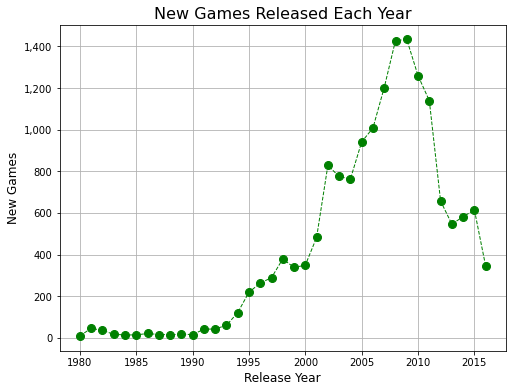

In [77]:
fig, ax = plt.subplots(figsize=(8,6))  # set the size of the chart

plt.plot(
    q1_dataset["release_year"],  # x-values
    q1_dataset["games_count"],   # y-values
    # additional aesthetic options you can play around with
    # view all options here: 
    color='green',               
    marker='o',
    linestyle='dashed',
    linewidth=1,
    markersize=8
)
# you may want to update some of this below!
plt.grid(True)
plt.title('New Games Released Each Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('New Games', fontsize=12)

# after plotting the data, format the labels with thousands comma separator
# yeah I know, the formatting input is x but the axis is y - deal with it...
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.tick_params(axis='y',which='major')

# you can uncomment these next 2 lines to see what happens
# ax.xaxis.set_major_formatter('{x:,.0f}')
# ax.tick_params(axis='x',which='major')

# show the chart
plt.show()

# uncomment the code below to save the chart to a file
# you can also change the name of the file output too
# plt.savefig('yearly_game_releases.png')

# you can also uncomment the next line to create a new directory
# and save the file to a specific path
# if not os.path.exists('outputs'):
#     os.makedirs('outputs')
# plt.savefig('outputs/yearly_game_releases.png')

### Question 2

> What are most popular game ever based on global sales?

### Question 3

> What are the top genres by sales?

### Question 4

> What are the average sales for each genre?

### Question 5

> Which games perform the best for each genre?

### Question 6

> What are the sales for each region?

### Question 7

> Which games perform the best for each region?